<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Regularisation – LASSO
© ExploreAI Academy

In this notebook, we'll learn about L1, L2, LASSO regression, and sparsity.

## Learning objectives

By the end of this notebook, you should be able to:
- Understand the difference between L1 and L2 regularisation.
- Understand the code required to implement a LASSO regression model.
- Understand the concept of sparsity.

## Shrinkage methods

In the train on ridge regression, we discovered that it's feasible to enhance the performance of a least squares regression model on the test set by diminishing the size of some of the coefficients, denoted as $\hat{\beta}$.

This technique employed in ridge regression, aimed at decreasing the magnitude of the coefficients that are deemed less crucial, is known as a _shrinkage_ method. The primary goal here is to "shrink" the values of these coefficients to make the model more robust and potentially improve its predictive accuracy.

In the context of ridge regression, it is indeed possible to significantly reduce a coefficient's value, pushing it towards zero. However, it's important to note that while these values can get very close to zero, they do not actually reach a zero value. This characteristic means that while ridge regression effectively minimises the influence of less important variables, it does not entirely eliminate them, maintaining all the variables in the final model.

## L1 vs. L2 regularisation

Let's recall the optimisation expression for ridge regression:

$$\min_{\beta} (\text{RSS} + \alpha\sum_{j=1}^p\beta_j^2)$$

Here, the goal is to minimise the residual sum of squares (RSS) alongside a penalty term. This expression can be simplified to:

$$\min_{\beta} (\text{RSS} + \alpha(L2\_norm))$$

where $L2\_norm$ represents the sum of the squares of the coefficients, emphasising the squared magnitude of coefficients as the penalty.

In contrast, LASSO regularisation introduces the $L1\_norm$, which is the sum of the _absolute_ values of the coefficients:

$$\min_{\beta} (\text{RSS} + \alpha\sum_{j=1}^p|\beta_j|)$$

or,

$$\min_{\beta} (\text{RSS} + \alpha(L1\_norm))$$

This adaptation, known as LASSO (Least Absolute Shrinkage and Selection Operator), has the distinct ability to reduce some coefficients exactly to zero, thereby effectively eliminating those predictors from the model. This results in a sparse model that utilises a subset of all available predictors, achieving both coefficient shrinkage and feature selection simultaneously.

## LASSO regression in `sklearn`

We'll make use of the same dataset that we did in the least squares and ridge regression trains, such that we can effectively compare the results of each method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv', index_col=0)
df.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity,BiodiversityHealthIndex
Year,,,,,,,,,,,,,,,,
2010,35,7.542535,6.630073,39,46,1.193810,0.032204,70,33,13,22,1.419332,1.671324,9.311312,0.270434,0.194332
2010,13,1.617642,6.477132,45,18,8.484718,-4.803485,69,67,57,63,3.048794,5.815305,4.698086,0.729916,0.525779
2010,10,0.904817,9.069428,28,59,3.412444,-2.563852,72,85,37,46,7.863218,9.543694,2.080495,0.068508,0.684795
2010,36,7.060190,7.061932,37,88,9.718453,3.425382,64,85,96,60,1.065595,4.938359,2.192657,0.145065,0.926146
2010,24,8.439246,4.504786,41,88,9.118186,-1.295086,12,0,85,61,9.785784,2.114002,7.405189,0.809798,0.126345


In [3]:
df.shape

(1000, 16)

## Preprocessing
We'll be using the same dataset and train/test split as in previous regression trains, and again, we will need to standardise the data before it can be used in our LASSO model.

In [4]:
# Separate the features from the response
X = df.drop('BiodiversityHealthIndex', axis=1)
y = df['BiodiversityHealthIndex']

In [5]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [6]:
# Create standardization object
scaler = StandardScaler()

In [7]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [8]:
# Import train/test split module
from sklearn.model_selection import train_test_split

In [9]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [10]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [11]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [12]:
# Train the LASSO model
lasso.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [13]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [14]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [15]:
# Extract intercept
print("Intercept:", float(intercept))

Intercept: 0.49906676138993555


Let's take a look at the actual coefficient values:

In [16]:
coeff

,Coefficient
WaterQualityIndex,0.000000
ClimateChangeImpactScore,-0.000513
LandUseChange,0.001296
InvasiveSpeciesCount,0.002664
ConservationFunding,-0.004523
EcoTourismImpact,-0.010264
ForestCoverChange,-0.004398
SoilQualityIndex,0.000000
WaterUsage,0.000000
RenewableEnergyUsage,0.000000


### Interpretation of the intercept and coefficients

The interpretation of the intercept and coefficients remains consistent:

- The intercept is understood as the **expected `BiodiversityHealthIndex` when all predictors are at their mean values**.
- Each coefficient represents the expected change in the `BiodiversityHealthIndex` for a one-unit increase in the **scaled predictor**.

The list of coefficients demonstrates that some coefficients have been effectively reduced to zero, highlighting the impact of regularisation in feature selection and model simplification.

## Assessment of predictive accuracy
Again, we'll make use of the `sklearn.metrics` library to assess the accuracy of our model. We'll fit the following models as well, in order to compare the LASSO results thoroughly:

- A least squares model using all available predictors.
- A least squares model using the predictors with non-zero coefficients from LASSO.
- A ridge regression model using all available predictors.

In [17]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression, Ridge

# Assuming 'df' is the DataFrame loaded from the SDG_15_Life_on_Land_Dataset.csv
X_subset = df.drop(['BiodiversityHealthIndex'], axis=1)  # Dropping the response variable

# Assuming 'scaler' is already defined and 'y' contains 'BiodiversityHealthIndex'
X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset_scaled, 
                                                        y, 
                                                        test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# Least squares using all predictors
lm_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()

lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [18]:
from sklearn import metrics

In [19]:
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)
train_lasso = lasso.predict(X_train)

In [20]:
# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [21]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_train2, train_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_test2, test_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [22]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [23]:
# View the results
results_df

,Training MSE,Test MSE
"Least Squares, Subset",0.081708,0.079791
"Least Squares, All",0.081708,0.079791
Ridge,0.081708,0.079787
LASSO,0.082665,0.078657


In [24]:
# we want to plot the train and test response variables as a continuous line
train_plot = pd.concat([y_train, pd.Series(y_test.iloc[0], index=['Next Time Point'])])


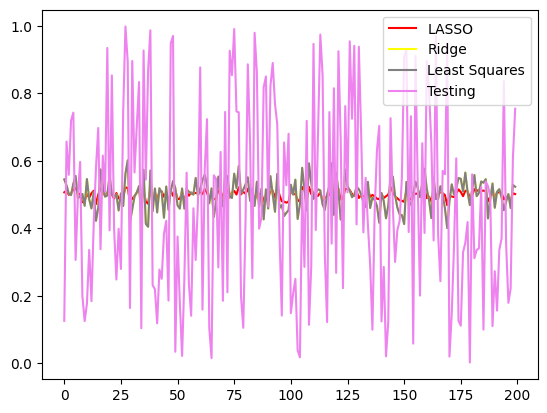

In [25]:
plt.plot(np.arange(len(y_test)), lasso.predict(X_test), label='LASSO',color='red')
plt.plot(np.arange(len(y_test)), ridge.predict(X_test), label='Ridge', color='yellow')
plt.plot(np.arange(len(y_test)), lm_all.predict(X_test), label='Least Squares', color='grey')
plt.plot(np.arange(len(y_test)), y_test.values, label='Testing', color='violet')
plt.legend()

plt.show()

## Conclusion

In this train, we have seen or been introduced to:

- The purpose of shrinkage methods.
- L1 and L2 regularisation.
- The LASSO regularisation method.
- Comparing LASSO to least squares and ridge regression models.

## Appendix 
Links to additional resources to help with the understanding of concepts presented in the train:

- [Explanation of how LASSO performs variable selection by authors of ISLR](https://www.youtube.com/watch?v=FlSQgXv7Dvw)

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>